In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [3]:
def crop_bottom_half(image):
    cropped_img = image[int(image.shape[0]/2):image.shape[0]]
    return cropped_img

In [4]:
def do_cluster(img_path):
    
    K =5
    
    original_image=cv2.imread(img_path)
    original_image=crop_bottom_half(original_image)
    img=cv2.cvtColor(original_image,cv2.COLOR_BGR2HSV)
    vectorized = img.reshape((-1,3))
#     vectorized.shape
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    img=cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    result_image=cv2.cvtColor(result_image, cv2.COLOR_HSV2RGB)
    return result_image,img,center

In [14]:
# folder='/home/vicky/Documents/HUL SKU WORK/SKU DOVE ROI PINK'
folder='/home/vicky/Documents/HUL SKU WORK/SKU DOVE ROI GREEN'

In [15]:
count=len(os.listdir(folder))

In [16]:
figure_size = 40

In [17]:
def hexencode(rgb):
    rgb=cv2.cvtColor(rgb.reshape(1,1,3), cv2.COLOR_HSV2RGB)
    rgb=rgb.squeeze()
#     print(rgb)
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)



plt.show()

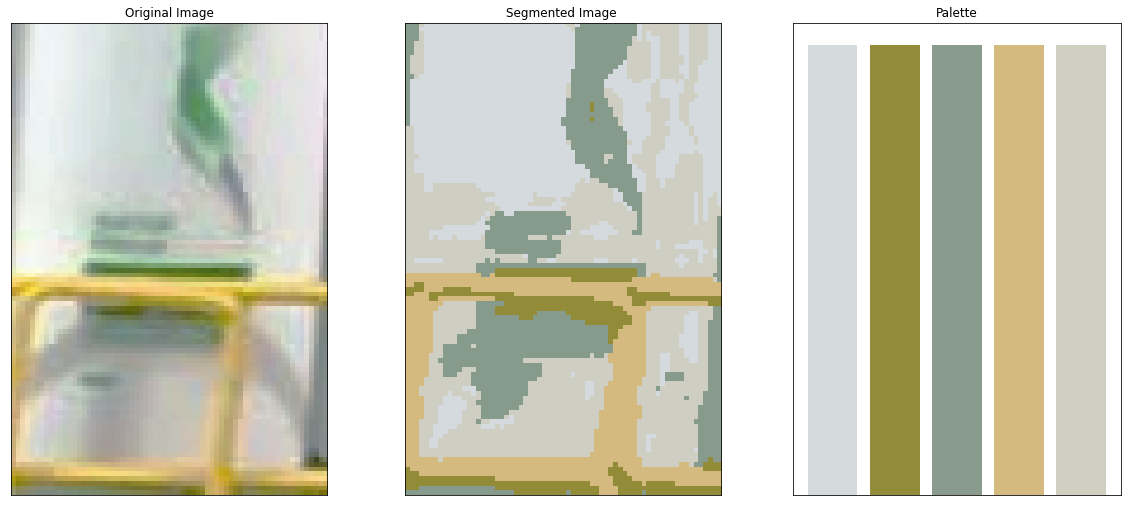

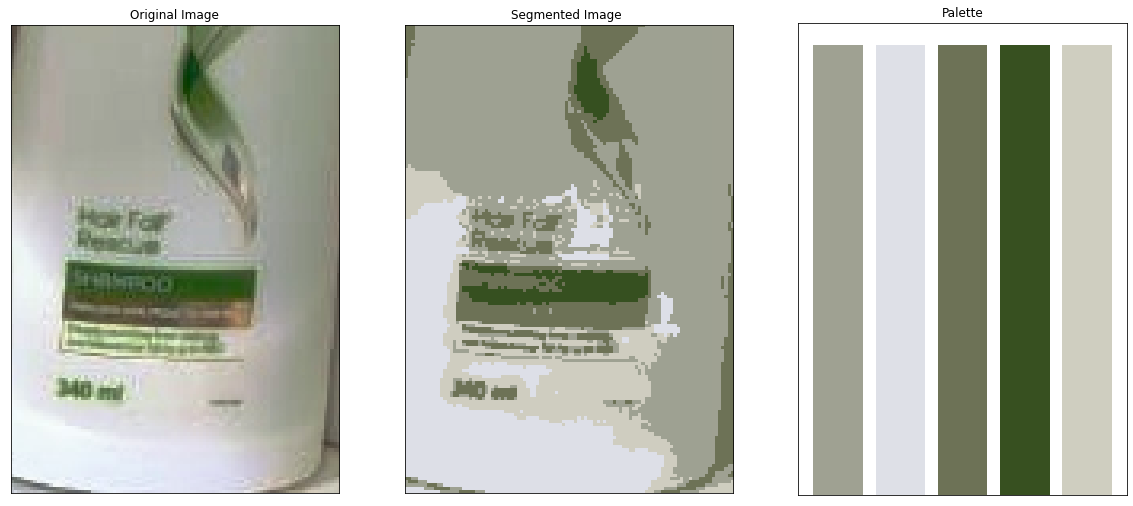

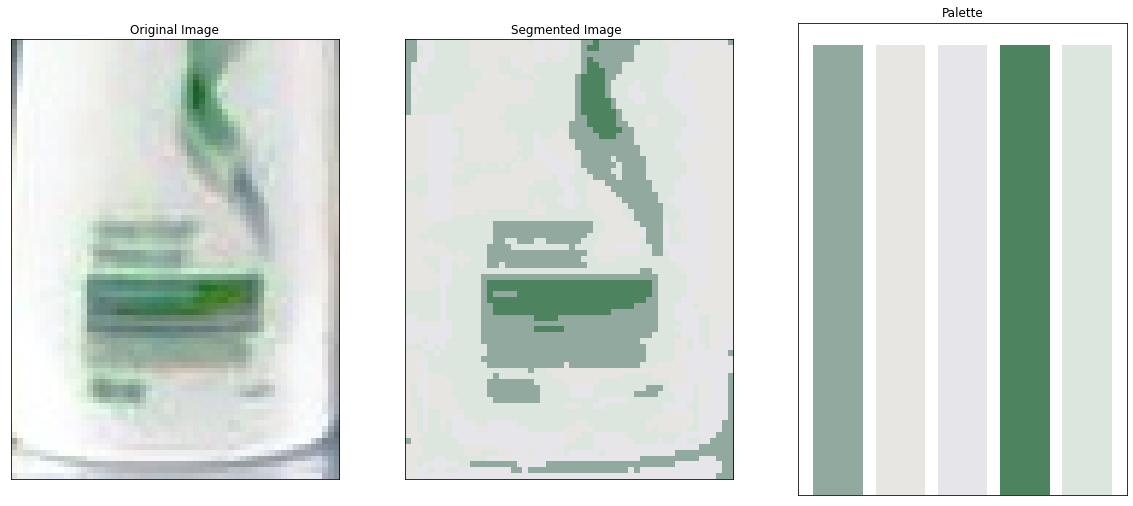

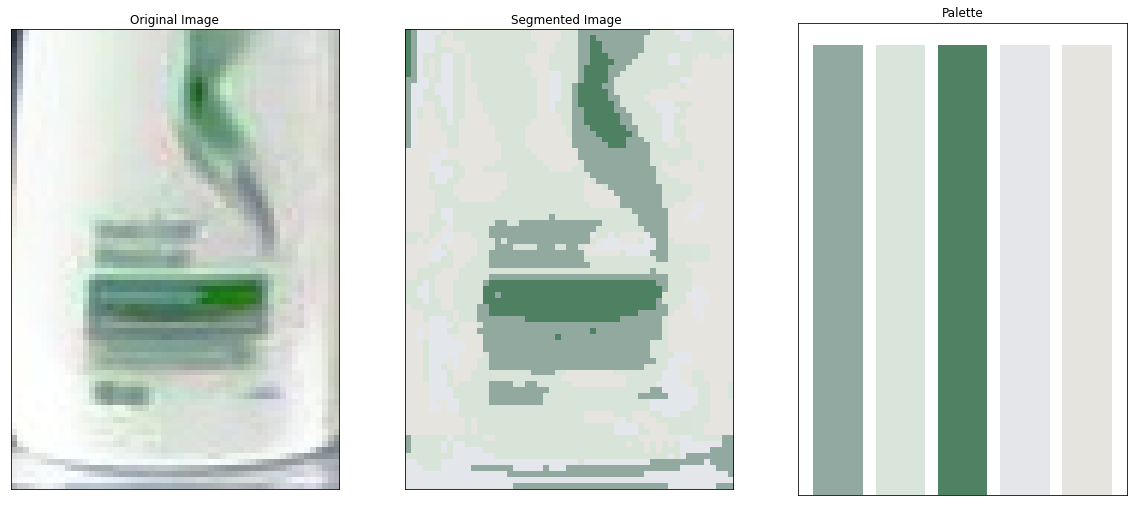

In [18]:
idx=1
for file in os.listdir(folder):
    file_path=os.path.join(folder,file)
#     print(file_path)
    result_image,img,center=do_cluster(file_path)
    plt.figure(figsize=(20,figure_size))
    plt.subplot(count,3,idx),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(count,3,idx+1),plt.imshow(result_image)
    plt.title("Segmented Image "), plt.xticks([]), plt.yticks([])
    plt.subplot(count,3,idx+2),
    for id, a in enumerate(center):
        plt.bar(id, 5, color=hexencode(a))  
    plt.title("Palette"), plt.xticks([]), plt.yticks([])

    idx+=3
     

# plt.show()
# plt.close()    
# plt.savefig('home/vicky/Documents/dove_palette.png')  
    

In [ ]:
result_image,img=do_cluster('/home/vicky/Documents/SKU DOVE ROI/roi136.jpg'  )

In [ ]:
# figure_size = 10
# plt.figure(figsize=(figure_size,figure_size))
# plt.subplot(2,2,1),plt.imshow(img)
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,2),plt.imshow(result_image)
# plt.title('Segmented Image when K = %i' % 5), plt.xticks([]), plt.yticks([])

In [ ]:
def hexencode(rgb):
    print(rgb)
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(center):
    plt.bar(idx, 10, color=hexencode(c))

plt.show()